In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finsim.data import get_yahoofinance_data

from lppl.fit import LPPLModel

In [19]:
symdf = get_yahoofinance_data('^GSPC', '2005-01-01', '2008-09-01')

[*********************100%***********************]  1 of 1 completed


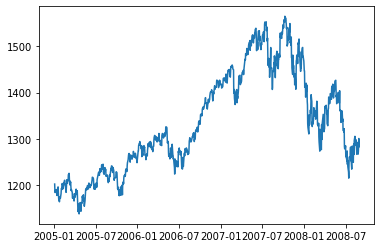

In [20]:
plt.plot(symdf['TimeStamp'], symdf['Close'])

In [21]:
fitted_lppl_model = LPPLModel()
fitted_lppl_model.omega_lo = 6 / (24*3600.)
fitted_lppl_model.omega_hi = 13 / (24*3600.)
fitted_lppl_model.fit(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/lppl/fit.py:40: OptimizeWarning: Initial guess is not within the specified bounds
  sol = minimize(


In [22]:
print(fitted_lppl_model)

tc: 1219968000.2008877
m: 0.7922101846476661
omega: 0.00015046296296296297
A: 7.089833666042334
B: -0.44808055080307957
C: 0.44808227175947674
phi: 2.672880861744186e-08


In [23]:
pd.Timestamp.fromtimestamp(fitted_lppl_model.tc)

Timestamp('2008-08-28 20:00:00.200888')

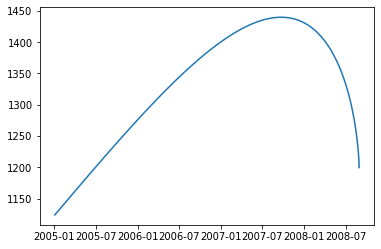

In [24]:
plt.plot(symdf['TimeStamp'], fitted_lppl_model(symdf['TimeStamp'].map(lambda ts: ts.timestamp())))

In [25]:
symdf['TimeStamp'].map(lambda ts: ts.timestamp()).map(lambda f: pd.Timestamp.fromtimestamp(f))

Date
2005-01-03   2005-01-02 19:00:00
2005-01-04   2005-01-03 19:00:00
2005-01-05   2005-01-04 19:00:00
2005-01-06   2005-01-05 19:00:00
2005-01-07   2005-01-06 19:00:00
                     ...        
2008-08-25   2008-08-24 20:00:00
2008-08-26   2008-08-25 20:00:00
2008-08-27   2008-08-26 20:00:00
2008-08-28   2008-08-27 20:00:00
2008-08-29   2008-08-28 20:00:00
Name: TimeStamp, Length: 922, dtype: datetime64[ns]